In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt 

In [2]:
# device conf : using GPU if it is available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [3]:
# hyperparameters
input_size = 784 # = 28*28
hidden_size = 100
num_classes = 10 # 10 classes possible 
num_epochs = 2
batch_size = 100
learning_rate = 0.001

In [4]:
# set the data set
train_dataset = torchvision.datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

train_loader  = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False) 
#there is no need to shuffle for the evaluation 

In [5]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


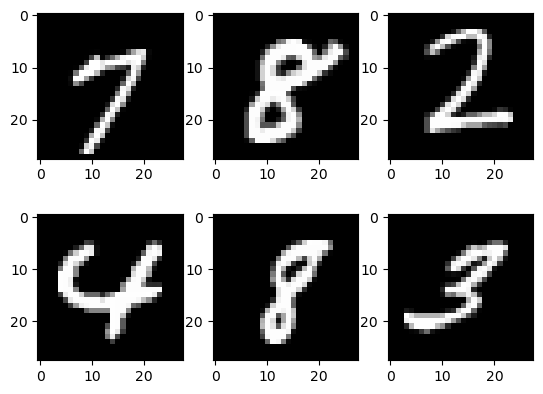

In [6]:
for i in range(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [21]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # the loss cross entropy used below already implements the solftmax function at the end
        return out

In [22]:
model = NeuralNet(input_size, hidden_size, num_classes)

In [23]:
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

In [24]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()

# the weight is contained in model.parameters()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [25]:
# training loop
n_total_step = len(train_loader)

for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # i is the index of the current batch, goes from 0 to ceil(sample_size/batch_size)-1
        # we have to reshape the input image shape
        # in a single batch, it is (100, 1, 28, 28) 100 samples, 1 channel and 28*28 pixels
        # the model receives 100 samples of shape 784(=28*28) as input at every iteration
        # use GPU defined by the variable device
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step() #update the weights

        # show the result every 100 steps
        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step{i+1} / {n_total_step}, loss={loss.item():.4f}')

RuntimeError: "host_softmax" not implemented for 'Long'